In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/yoga_poses/train/keypoints_train.csv")
df

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,guy1_cobra029.jpg,cobra,0.695158,0.351986,0.994802,0.691768,0.336853,0.993747,0.689520,0.336608,...,0.292625,0.089721,0.396789,0.715409,0.087280,0.438936,0.283799,0.053271,0.448374,0.791703
1,guy1_cobra077.jpg,cobra,0.502434,0.289754,0.999885,0.512113,0.271161,0.999840,0.518931,0.269449,...,0.000020,0.468991,0.389079,0.000020,0.524224,0.394679,0.000299,0.479999,0.400276,0.000253
2,guy1_cobra066.jpg,cobra,0.546174,0.298116,0.999984,0.550425,0.280997,0.999977,0.554685,0.279373,...,0.000648,0.366751,0.366867,0.001203,0.460346,0.396968,0.005579,0.358810,0.395779,0.013772
3,girl1_cobra122.jpg,cobra,0.101157,0.293216,0.999900,0.126332,0.260773,0.999903,0.137849,0.261175,...,0.436299,0.269247,0.774629,0.167474,0.869181,0.621636,0.316645,0.223100,0.770806,0.125188
4,guy1_cobra048.jpg,cobra,0.762424,0.317569,0.999998,0.759663,0.300570,0.999998,0.759083,0.299954,...,0.695831,0.284309,0.394226,0.942903,0.347838,0.430101,0.908938,0.274616,0.428988,0.993884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,girl2_dog105.jpg,dog,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,girl3_dog031.jpg,dog,0.548339,0.813525,0.999991,0.561228,0.815552,0.999982,0.563736,0.812423,...,0.672564,0.223080,0.606819,0.785543,0.310847,0.502282,0.479529,0.210618,0.627633,0.632394
997,girl3_dog052.jpg,dog,0.469621,0.814574,0.999930,0.481775,0.821967,0.999881,0.485691,0.819684,...,0.730429,0.292361,0.451673,0.470134,0.325162,0.489820,0.540362,0.304964,0.440109,0.319529
998,guy2_dog045.jpg,dog,0.487759,0.565500,0.999936,0.507074,0.564433,0.999813,0.509423,0.560165,...,0.948368,0.045092,0.562579,0.993277,0.141989,0.558526,0.953527,0.098225,0.601065,0.991603


In [ ]:
df.shape

(1000, 101)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/yoga_poses/test/keypoints_test.csv")
df_test.shape

(495, 101)

In [ ]:
df[df['NOSE_x']==0].shape

(85, 101)

In [ ]:
df = df.drop(df[df['NOSE_x']==0].index)
df

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,guy1_cobra029.jpg,cobra,0.695158,0.351986,0.994802,0.691768,0.336853,0.993747,0.689520,0.336608,...,0.292625,0.089721,0.396789,0.715409,0.087280,0.438936,0.283799,0.053271,0.448374,0.791703
1,guy1_cobra077.jpg,cobra,0.502434,0.289754,0.999885,0.512113,0.271161,0.999840,0.518931,0.269449,...,0.000020,0.468991,0.389079,0.000020,0.524224,0.394679,0.000299,0.479999,0.400276,0.000253
2,guy1_cobra066.jpg,cobra,0.546174,0.298116,0.999984,0.550425,0.280997,0.999977,0.554685,0.279373,...,0.000648,0.366751,0.366867,0.001203,0.460346,0.396968,0.005579,0.358810,0.395779,0.013772
3,girl1_cobra122.jpg,cobra,0.101157,0.293216,0.999900,0.126332,0.260773,0.999903,0.137849,0.261175,...,0.436299,0.269247,0.774629,0.167474,0.869181,0.621636,0.316645,0.223100,0.770806,0.125188
4,guy1_cobra048.jpg,cobra,0.762424,0.317569,0.999998,0.759663,0.300570,0.999998,0.759083,0.299954,...,0.695831,0.284309,0.394226,0.942903,0.347838,0.430101,0.908938,0.274616,0.428988,0.993884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,girl1_dog059.jpg,dog,0.563954,0.534181,0.998202,0.570986,0.546879,0.998455,0.578014,0.546210,...,0.093362,0.634279,0.532216,0.031269,0.694004,0.666484,0.318410,0.642069,0.628003,0.095843
996,girl3_dog031.jpg,dog,0.548339,0.813525,0.999991,0.561228,0.815552,0.999982,0.563736,0.812423,...,0.672564,0.223080,0.606819,0.785543,0.310847,0.502282,0.479529,0.210618,0.627633,0.632394
997,girl3_dog052.jpg,dog,0.469621,0.814574,0.999930,0.481775,0.821967,0.999881,0.485691,0.819684,...,0.730429,0.292361,0.451673,0.470134,0.325162,0.489820,0.540362,0.304964,0.440109,0.319529
998,guy2_dog045.jpg,dog,0.487759,0.565500,0.999936,0.507074,0.564433,0.999813,0.509423,0.560165,...,0.948368,0.045092,0.562579,0.993277,0.141989,0.558526,0.953527,0.098225,0.601065,0.991603


In [ ]:
df_test = df_test.drop(df_test[df_test['NOSE_x']==0].index)
df_test

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,LEFT_HEEL_score,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_score,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_score,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score
0,guy3_cobra105.jpg,cobra,0.378402,0.669711,0.999983,0.386054,0.651726,0.999989,0.391180,0.650924,...,0.965163,0.776324,0.716895,0.781139,0.864347,0.746681,0.988273,0.775530,0.754091,0.878288
2,guy3_cobra117.jpg,cobra,0.308032,0.710489,0.999941,0.315171,0.693366,0.999960,0.318744,0.692870,...,0.962294,0.821999,0.733014,0.502127,0.910294,0.786802,0.962738,0.809372,0.768847,0.432908
3,guy3_cobra118.jpg,cobra,0.303349,0.716624,0.999827,0.309298,0.699005,0.999894,0.313343,0.697472,...,0.903851,0.851864,0.732321,0.412534,0.916698,0.776913,0.877450,0.854070,0.779848,0.291451
4,guy3_cobra084.jpg,cobra,0.473124,0.624275,0.999989,0.480713,0.605332,0.999994,0.488413,0.604512,...,0.020454,0.673970,0.756261,0.027194,0.665845,0.602300,0.084153,0.681845,0.785890,0.081126
5,guy3_cobra078.jpg,cobra,0.490894,0.593767,0.999995,0.502354,0.576647,0.999998,0.509523,0.575164,...,0.003248,0.552549,0.574436,0.005882,0.643292,0.566276,0.016113,0.549529,0.600825,0.020380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,guy3_dog069.jpg,dog,0.572424,0.511917,0.991298,0.578822,0.522610,0.987371,0.583741,0.522709,...,0.025253,0.581888,0.436273,0.020534,0.659041,0.536622,0.022920,0.598058,0.513528,0.018195
489,guy3_dog106.jpg,dog,0.490139,0.532011,0.992828,0.480733,0.535561,0.991478,0.482735,0.534888,...,0.647031,0.809067,0.576883,0.041104,0.798758,0.630806,0.741345,0.758707,0.621080,0.071471
490,guy3_dog095.jpg,dog,0.613168,0.566781,0.957893,0.614353,0.581751,0.968269,0.619105,0.583366,...,0.068955,0.764767,0.520313,0.017947,0.815371,0.632029,0.082178,0.739434,0.592465,0.018023
491,guy3_dog090.jpg,dog,0.625777,0.566439,0.967414,0.628639,0.579190,0.974795,0.635134,0.580510,...,0.058319,0.754009,0.531793,0.022259,0.811297,0.592679,0.063656,0.771875,0.561290,0.017979


In [ ]:
df[df['NOSE_x']==0].shape

(0, 101)

In [ ]:
df.labels.unique()

array(['cobra', 'chair', 'tree', 'warrior', 'dog'], dtype=object)

In [ ]:
df.labels[df.labels=='cobra']=0
df.labels[df.labels=='chair']=1
df.labels[df.labels=='tree']=2
df.labels[df.labels=='warrior']=3
df.labels[df.labels=='dog']=4

df_test.labels[df_test.labels=='cobra']=0
df_test.labels[df_test.labels=='chair']=1
df_test.labels[df_test.labels=='tree']=2
df_test.labels[df_test.labels=='warrior']=3
df_test.labels[df_test.labels=='dog']=4

<ipython-input-344-bb3a62d81006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='cobra']=0
<ipython-input-344-bb3a62d81006>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='chair']=1
<ipython-input-344-bb3a62d81006>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels[df.labels=='tree']=2
<ipython-input-344-bb3a62d81006>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
df.labels

0      0
1      0
2      0
3      0
4      0
      ..
994    4
996    4
997    4
998    4
999    4
Name: labels, Length: 915, dtype: object

In [ ]:
x = df.drop(['file_name', 'labels'], axis=1)
y = df.labels

In [ ]:
x_test = df_test.drop(['file_name', 'labels'], axis=1)
y_test = df_test.labels

In [ ]:
y = y.astype('float64')
y_test = y_test.astype('float64')

In [ ]:
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(732, 99)
(732, 5)


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(99,)))
# model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                6400      
                                                                 
 dense_42 (Dense)            (None, 128)               8320      
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 5)                 325       
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/yoga_poses/weights.best_ann.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystopping])

Epoch 1/200
13/23 [===============>..............] - ETA: 0s - loss: 1.5586 - accuracy: 0.3197 
Epoch 1: val_accuracy improved from -inf to 0.47541, saving model to /content/drive/MyDrive/UGP23/dataset/yoga_poses/weights.best_ann.hdf5
23/23 [==============================] - 3s 29ms/step - loss: 1.5040 - accuracy: 0.3921 - val_loss: 1.3979 - val_accuracy: 0.4754
Epoch 2/200
18/23 [======================>.......] - ETA: 0s - loss: 1.2589 - accuracy: 0.5972
Epoch 2: val_accuracy improved from 0.47541 to 0.61202, saving model to /content/drive/MyDrive/UGP23/dataset/yoga_poses/weights.best_ann.hdf5
23/23 [==============================] - 0s 7ms/step - loss: 1.2168 - accuracy: 0.6202 - val_loss: 1.1241 - val_accuracy: 0.6120
Epoch 3/200
18/23 [======================>.......] - ETA: 0s - loss: 0.9429 - accuracy: 0.6944
Epoch 3: val_accuracy improved from 0.61202 to 0.67760, saving model to /content/drive/MyDrive/UGP23/dataset/yoga_poses/weights.best_ann.hdf5
23/23 [=========================

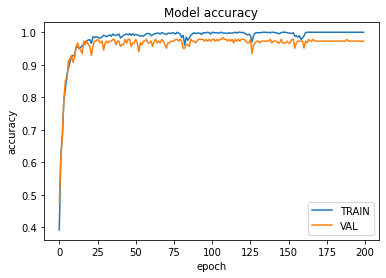

In [ ]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_train, y_train)

23/23 [==============================] - 0s 2ms/step - loss: 3.7564e-04 - accuracy: 1.0000


[0.0003756423539016396, 1.0]

In [ ]:
model.evaluate(x_val, y_val)

6/6 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9727


[0.09894849359989166, 0.9726775884628296]

In [ ]:
y_pred = model.predict(x_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[9.9998868e-01, 2.5792122e-06, 2.1504101e-13, 3.0266850e-07,
        8.3011255e-06],
       [9.9984491e-01, 5.7956345e-06, 1.8241519e-12, 4.1252351e-06,
        1.4502484e-04],
       [9.9464381e-01, 3.2233263e-05, 2.1899141e-10, 8.0469272e-06,
        5.3158975e-03],
       ...,
       [1.3371994e-10, 4.3762091e-11, 2.1422510e-09, 6.8539514e-08,
        9.9999988e-01],
       [2.4075397e-10, 4.5367494e-11, 4.7108667e-10, 1.1900079e-07,
        9.9999988e-01],
       [9.7605071e-09, 3.3433800e-10, 1.3661246e-10, 2.8583885e-05,
        9.9997139e-01]], dtype=float32)

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 0, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3,

In [ ]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size
for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'cobra'
    if(y_test[i]==1): pose_test[i] = 'chair'
    if(y_test[i]==2): pose_test[i] = 'tree'
    if(y_test[i]==3): pose_test[i] = 'warrior'
    if(y_test[i]==4): pose_test[i] = 'dog'

for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'cobra'
    if(y_pred[i]==1): pose_pred[i] = 'chair'
    if(y_pred[i]==2): pose_pred[i] = 'tree'
    if(y_pred[i]==3): pose_pred[i] = 'warrior'
    if(y_pred[i]==4): pose_pred[i] = 'dog'

In [ ]:
confusion_matrix(pose_test, pose_pred)

array([[72,  1,  0,  0,  0],
       [ 0, 95,  0,  0,  0],
       [ 0,  0, 73,  0,  0],
       [ 0,  0,  0, 74,  0],
       [ 1,  5,  4,  1, 55]])

In [ ]:
pip install -q scikit-plot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

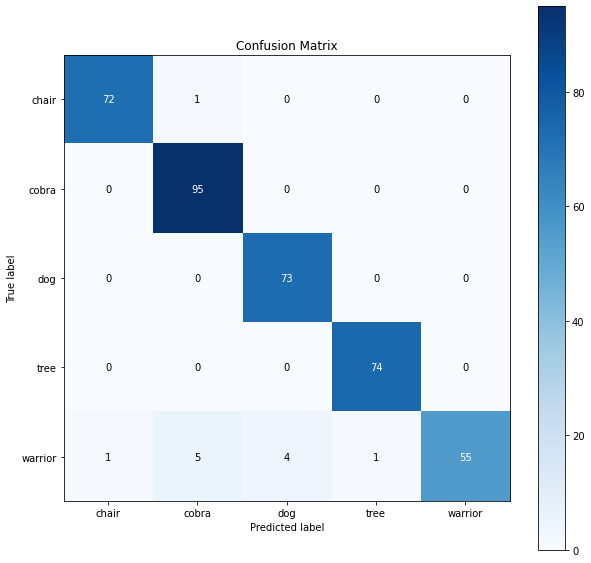

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))